
<h1><b>Statistique en Bioinformatique : </b> TME1 </h1>
<br>
L’objectif de ce TME est l’analyse statistique d’une famille de protéines à travers son alignement de séquences:
<br>
<ul>
<li> objectif 1: détection des positions conservées, </li>
<li> objectif 2: détection de séquences qui appartiennent à la même famille, </li>
</ul>
<vr>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Soumission**</p>
<ul>
<li>Renomer le fichier TME1.ipynb pour TME1_NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre à https://www.dropbox.com/request/ZylCDDpggbrN5toTiJKV </li>
</ul>
</div>

Nom etudiant 1 : Dorval Loïc
<br>
Nom etudiant 2 : Leroy Adrien
<br>

<b>DONNÉES</b> <br>
Il y a 2 fichiers avec les données telecharché à (<a href="http://www.lcqb.upmc.fr/julianab/teaching/SBAS/TME1.tar.gz"> TME1 </a> ): <br>
<ul>
<li> Dtrain.txt: C’est un alignement de M = 5643 protéines d’une seule famille en format FASTA,
<br>
    Lignes qui commencent avec “>” contiennent des commentaires (nome de la protéine etc.). Elles n’ont aucune importance pour notre projet. Les autres lignes contiennent les séquences, que l’on va utiliser dans le projet. Les séquences sont alignées, elles ont toutes la même longueur (L = 48 positions dans notre fichier). Chaque position i = 0, ..., L − 1 d'une séquence contient ou une acide aminé (A,C,...,Y, il y en a 20) ou un trou (–), que l'on considère comme 21ème lettre. Ensemble elles forment l'alphabet: 
    A =  {A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y, -}, avec q = 21 lettres différentes.
</li>
    <br>
<li> testseq.txt:  testseq.txt: Même format de Dtrain.txt, mais avec une seule séquence b = (b0 , ..., bN −1 ) plus longue (longueur N = 114 > L). On va scanner cette séquence pour trouver une sous-séquence qui appartient à la famille definie par Dtrain.txt. </li>
</ul>

Exercise 1: Pour chaque position du alignement i = 0, ..., L − 1 et chaque acide aminée a ∈ A (le trou compris), calculer le nombre d’occurence ni(a) et le poid ωi(a), òu : <br>
\begin{equation*}
\label{eq1}
n_{i}(a) = \textrm{nombre d’occurences d’acide aminée a en position (colonne) i}.
\end{equation*}

<br>
\begin{equation*}
\omega_i(a) = \frac{n_i(a)+1}{M+q}\ .
\end{equation*}

In [1]:
mat_td=[
    ['A','C','C','T','G'],
    ['A','C','T','C','G'],
    ['A','C','C','T','-'],
    ['A','C','T','-','C'],
    ['A','A','C','T','C'],
    ['A','C','G','C','G'],
    ['C','C','A','T','C'],
    ['A','-','T','T','G'],
    ['A','A','C','T','G'],
    ['C','A','A','C','G']]

In [2]:
import sys
import numpy as np
aa_PROT = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
q = 21
#aa = ['A', 'B', 'C', '-']
#q = 4
aa_ADN = ['A', 'G', 'C', 'T', '-']
#q = 5

In [3]:
#load path Files
input_dataset_f = 'Dtrain.txt'
input_sequence_f = 'test_seq.txt'
#input_dataset_f = 'DtrainToy.txt'
#input_sequence_f = 'test_seqToy.txt'
#input_dataset_f = 'DtrainToyTD.txt'

In [4]:
#load DTrain File
def readfasta(fichier):
    Liste_esp=[]
    Liste_seq=[]
    flux=open(fichier,'r')
    ligne=flux.readline()
    while ligne!='':
        ligne=ligne[0:-1]
        if ligne[0]=='>':
            Liste_esp.append(ligne)
        else:
            
            Liste_seq.append(ligne)
        ligne=flux.readline()
    return(Liste_esp,Liste_seq)
    
Especes,Sequences=readfasta(input_dataset_f)

In [5]:
#Computing wi(a)
def computing_wi(liste,alphabet):
    Poids=np.ones((len(alphabet),len(liste[0])))
    for i in range(len(liste[0])):
        for j in range(len(liste)):     
            Poids[alphabet.index(liste[j][i])][i]+=1
    Poids=(Poids)/(len(liste)+len(alphabet))
    return Poids
            
esp_ADN,seq_ADN=readfasta('DtrainToyTD.txt')           
test_ADN=computing_wi(seq_ADN,aa_ADN)
print("matrice wi ADN :\n",test_ADN)

esp_PROT,seq_PROT=readfasta(input_dataset_f)           
test_PROT=computing_wi(seq_PROT,aa_PROT)
print("\n matrice wi protéine :\n",test_PROT)


matrice wi ADN :
 [[0.6        0.26666667 0.2        0.06666667 0.06666667]
 [0.06666667 0.06666667 0.13333333 0.06666667 0.46666667]
 [0.2        0.46666667 0.33333333 0.26666667 0.26666667]
 [0.06666667 0.06666667 0.26666667 0.46666667 0.06666667]
 [0.06666667 0.13333333 0.06666667 0.13333333 0.13333333]]

 matrice wi protéine :
 [[1.76553672e-04 7.25282486e-01 1.02401130e-02 ... 3.42514124e-02
  1.76553672e-04 2.38170904e-01]
 [1.76553672e-04 1.76553672e-04 1.94209040e-03 ... 7.59180791e-03
  1.76553672e-04 1.69491525e-02]
 [1.76553672e-04 1.76553672e-04 3.53107345e-04 ... 1.76553672e-04
  1.76553672e-04 1.76553672e-04]
 ...
 [1.76553672e-04 1.76553672e-04 1.76553672e-04 ... 1.76553672e-04
  1.76553672e-04 1.76553672e-04]
 [1.76553672e-04 1.76553672e-04 1.76553672e-04 ... 1.78319209e-02
  1.76553672e-04 1.76553672e-04]
 [3.13206215e-01 1.55367232e-01 8.20974576e-02 ... 5.66737288e-02
  6.77966102e-02 3.53460452e-01]]


Exercise 2: Trouvez les positions les plus conservées en utilisant l’entropie relative.
<br>
2.1) Pour chaque position i = 0, ..., L − 1, determiner l’entropie relative Si<br>
\begin{equation*}
\label{eq:entropie}
S_i = \log_2(q) + \sum_{a\in {\cal A}} \omega_i(a)\cdot \log_2\left[\omega_i(a) \right]\ .
\end{equation*}
<br>


In [6]:
#Computing Si
def Computing_Si(Poids,alphabet):
    Si=np.zeros(len(Poids[0]))
    q=len(alphabet)
    Somme=0
    for j in range(len(Poids[0])):
        Si[j]=np.log2(q)+np.sum(Poids[:,j]*np.log2(Poids[:,j]))
    return Si
Si_PROT=Computing_Si(test_PROT,aa_PROT)
print("Si Protéine :\n",Si_PROT,'\n')

Si_ADN=Computing_Si(test_ADN,aa_ADN)
print("Si ADN : \n",Si_ADN)

Si Protéine :
 [1.85476633 3.18077792 2.05319382 2.53568315 1.9140966  2.82157361
 0.73424974 1.99416979 0.79115378 0.6202211  1.18264986 1.45434222
 2.80863168 3.16855572 1.60729655 2.51440497 0.81070125 1.39964613
 3.22080975 2.45429088 1.04633148 2.29252912 0.59942831 2.29142322
 1.59356996 1.06695729 0.79152959 0.54565914 1.16188277 1.02144959
 1.76235378 4.17682738 1.96045244 0.77906727 2.57718029 1.05852036
 0.63617147 0.45471578 1.15729284 2.37264241 2.22108705 0.83146074
 0.77876262 3.87551396 1.28462265 2.20552991 3.98627283 2.0581654 ] 

Si ADN : 
 [0.633985   0.39180313 0.1726727  0.39180313 0.39180313]


2.2) Indiquez les acides aminees (ai*) des trois positions les plus conservées : 
\begin{equation}
\label{eq:conserved}
a_i^\star = {\rm argmax}_{a\in {\cal A}} \omega_i(a)\ .
\end{equation}

In [7]:
#computing ai*
def computing_ai(poids,alphabet):
    Enthropy=Computing_Si(poids,alphabet)
    Position=[]
    ai=[]
    for i in range(3):
        ind=np.argmax(Enthropy)
        Enthropy[ind]=0
        Position.append(ind)
        ai.append(alphabet[np.argmax(poids[:,ind])])
    return Position,ai

position,ai=(computing_ai(test_PROT,aa_PROT))

2.3) Tracer l’entropie rélative en fonction de chaque position i.

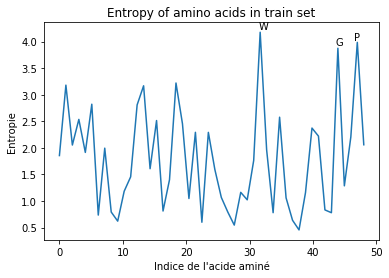

In [12]:
import matplotlib.pyplot as plt
#plot entropy

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Indice de l'acide aminé")
plt.ylabel('Entropie')
plt.title("Entropy of amino acids in train set")
ax.annotate(ai[0], xy=(position[0], Si_PROT[position[0]]), xytext=(position[0]+0.5, Si_PROT[position[0]]+0.05))
ax.annotate(ai[1], xy=(position[1], Si_PROT[position[1]]), xytext=(position[1]+0.5, Si_PROT[position[1]]+0.05))
ax.annotate(ai[2], xy=(position[2], Si_PROT[position[2]]), xytext=(position[2]+0.5, Si_PROT[position[2]]+0.05))
plt.plot(np.linspace(0,len(Si_PROT),len(Si_PROT)),Si_PROT)

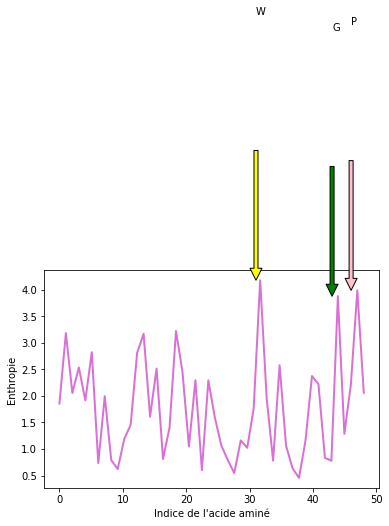

In [13]:
#plot entropy avec expérimentation d'affichage

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Indice de l'acide aminé")
plt.ylabel('Enthropie')
ax.annotate(ai[0], xy=(position[0], Si_PROT[position[0]]), xytext=(position[0], Si_PROT[position[0]]+5),
            arrowprops=dict(facecolor='yellow', shrink=0.5))
ax.annotate(ai[1], xy=(position[1], Si_PROT[position[1]]), xytext=(position[1], Si_PROT[position[1]]+5),
            arrowprops=dict(facecolor='pink', shrink=0.5))
ax.annotate(ai[2], xy=(position[2], Si_PROT[position[2]]), xytext=(position[2], Si_PROT[position[2]]+5),
            arrowprops=dict(facecolor='green', shrink=0.5))

plt.plot(np.linspace(0,len(Si_PROT),len(Si_PROT)),Si_PROT, 'orchid', linewidth=2, markersize=10)

Exercise 3: Déterminer les paramètres f(0)(b) du modèle nul, où
\begin{equation}
f^{(0)}(b) = \frac 1L \sum_{i=0}^{L-1} \omega_i(b)\ ,
\end{equation}

In [14]:
#computing f0
def modele_nul(poids):
    L=len(poids[0])
    nul=np.zeros((len(poids)))
    for i in range(len(nul)):
        nul[i]=np.sum(poids[i,:])/L
    return nul

nul_PROT=modele_nul(test_PROT)
print("modèle nul : \n",nul_PROT)

modèle nul : 
 [0.05880709 0.00751089 0.08008916 0.08491496 0.04194253 0.09048008
 0.01268244 0.05049067 0.05113804 0.07445048 0.01191369 0.03564545
 0.03793329 0.03431026 0.04506165 0.04843824 0.04072505 0.05916019
 0.0365981  0.03855491 0.05915284]


Exercise 4: (à appliquer à testseq.txt): Déterminer l(bi,...,bi+L−1)  pour chaque sous-séquence de longueur L. 
Déterminer si il y a des sous-séquences de la famille definie par Dtrain. 
Tracer la log-vraisemblance en fonction de sa première position i = 0, ..., N − L.
\begin{equation}
\label{eq:ll}
\ell(b_0,...,b_{L-1}) = \log_2 \frac {P(b_0,...,b_{L-1} | \omega )
}{P^{(0)}(b_0,...,b_{L-1})}
= \sum_{i=0}^{L-1} \log_2 \frac {\omega_i(b_i)}{f^{(0)}(b_i)}\ .
\end{equation}

4.1: Faites une fonction pour calculer la log-vraisemblance, d'une sequence de taille L.

In [18]:
#computing loglikehood

def loglikelihood(poids,nul,seq,alphabet):
    ind_seq=np.zeros(len(seq))
    proba=1
    proba_nul=1
    for i in range(len(seq)):
        ind_seq[i]=alphabet.index(seq[i])
    for i in range(len(ind_seq)-1):
        proba*=poids[int(ind_seq[i])][i] 
        proba_nul*=nul[int(ind_seq[i])] 
    return np.log2(proba/proba_nul)

4.2: Faites une fonction qui etant donner une sequence de taille superieur à L generer toutes les sous-séquences de taille L  

In [19]:
#computing sliding_window 
def sliding_window(poids,fichier):
    esp,seq=readfasta(fichier)
    seq=seq[0]
    liste_sous_seq=[]
    for i in range(len(seq)-len(poids[0])+1):
        liste_sous_seq.append(seq[i:(i+len(poids[0]))])
    return liste_sous_seq

4.3: Calculer la log-vraisemblance pour toutes les sous-sequences trouvé à 4.2 et tracer un graphique de log-vraisemblance x position initialle de la sous-sequence.

In [21]:
#computing log-vraisemblance
def computing_log(poids,nul,fichier,alphabet):
    liste_sous_seq=sliding_window(poids,fichier)
    liste_log=np.zeros(len(liste_sous_seq))
    for i in range(len(liste_sous_seq)):
        liste_log[i]=loglikelihood(poids,nul,liste_sous_seq[i],alphabet)
    return liste_log,liste_sous_seq

liste_log_PROT,liste_sous_seq_PROT=computing_log(test_PROT,nul_PROT,input_sequence_f,aa_PROT)
print("liste log : \n",liste_log_PROT)
print("\n\n")
print("liste des portions de séquences : \n",liste_sous_seq_PROT)

liste log : 
 [-117.81435649 -119.2938978   -90.78196136 -110.82262493 -153.05866915
 -129.71444114 -119.99943606 -157.05696337 -171.83796759 -134.18030556
 -147.60483205  -98.5534235  -111.73574954   70.52009586 -141.32931512
 -122.69859639 -143.5061597  -154.51215581 -138.72011977 -145.40085092
 -142.43870824 -141.62932907 -117.51197935 -117.47454208 -155.71943357
 -134.13817673 -108.68673117 -153.25709802 -138.37624842 -138.55402772
 -137.16573543 -131.41586532 -124.99033336 -119.27207389 -146.90310201
 -136.09600183 -132.54134638 -138.99943027 -121.54037066 -129.76820259
 -158.05274671 -120.26720952 -124.36526641 -138.91299362  -88.82183326
 -116.60479092  -98.28430302 -110.16678624 -133.71867181 -135.81698406
 -135.75053516 -113.42131078 -142.44780597 -126.07124952 -145.9259252
 -136.02445532 -164.92683543 -112.00029372 -124.01554638 -144.78411255
 -129.59583002 -135.98166175 -143.26824686 -156.98109369 -133.79047579
 -132.56232997 -124.92869539]



liste des portions de séquences

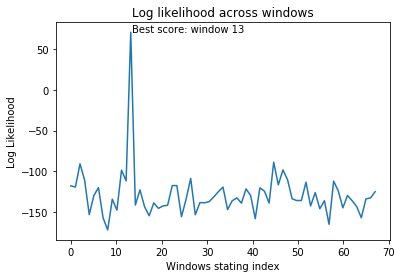

In [22]:
#ploting  log-vraisemblance x position initialle
maxi_log=max(liste_log_PROT)
indice_maxi_log=np.argmax(liste_log_PROT)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Windows stating index")
plt.ylabel('Log Likelihood')
plt.title("Log likelihood across windows")
ax.annotate("Best score: window "+str(indice_maxi_log), xy=(indice_maxi_log, maxi_log), xytext=(indice_maxi_log+0.5, maxi_log+0.05),)
plt.plot(np.linspace(0,len(liste_sous_seq_PROT),len(liste_sous_seq_PROT)),liste_log_PROT)